# Google 

In [138]:
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
!pip install google-play-scraper
!pip install WordCloud
!pip install textblob
!pip install emoji
!pip install pandas_profiling
import pandas as pd
import json
import regex
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
import re
import emoji
import seaborn as sns
from pandas_profiling import ProfileReport

In [139]:
from google_play_scraper import app

import pandas as pd

import numpy as np


In [140]:
#US Market

from google_play_scraper import Sort, reviews_all


us_reviews = reviews_all(
    'com.prayapp.client',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)


In [153]:
df_busu = pd.DataFrame(np.array(us_reviews),columns=['review'])


df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))


df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOF0efWK1niclhr31tJhWq6J4ZtOy36L-gEltLF...,CLINT Brandt,https://play-lh.googleusercontent.com/a/AATXAJ...,Love to start my trip to work with the morning...,5,0,2.63.1,2022-02-18 17:13:39,None,NaT
1,gp:AOqpTOGgcRoqRefqIr52jpFIz1eIAalKLcpStAh3DKd...,Nonya Businesd,https://play-lh.googleusercontent.com/a/AATXAJ...,Legit reviews deleted,1,0,2.62.2,2022-02-18 15:34:08,Nonya. Thank you for getting in touch regardin...,2022-02-07 03:01:13
2,gp:AOqpTOHXSqG1TpVaVaUIrlg-4SEl_TGgiA9NelOq3TN...,Loren Krege,https://play-lh.googleusercontent.com/a/AATXAJ...,I love waking up and reading God's words first...,5,0,None,2022-02-18 14:55:10,None,NaT
3,gp:AOqpTOEURhlyc43ehkHyg5Ylf3b8KrR1UcA7oJYJIy-...,Tommie Brown,https://play-lh.googleusercontent.com/a/AATXAJ...,I love the daily word.,5,0,2.59.1,2022-02-18 12:12:54,None,NaT
4,gp:AOqpTOFdA-kInCzdM3HVl30xJQPTSSNf5OHwgKrnpYN...,Frank Perez,https://play-lh.googleusercontent.com/a/AATXAJ...,Puts me at ease in my times of loneliness and ...,5,0,2.63.0,2022-02-18 11:37:10,None,NaT


In [154]:
df_busu.to_csv('googleappScrap.csv')

In [155]:
prof = ProfileReport(df_busu)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

5    8596
1    1155
4     753
3     289
2     221
Name: score, dtype: int64

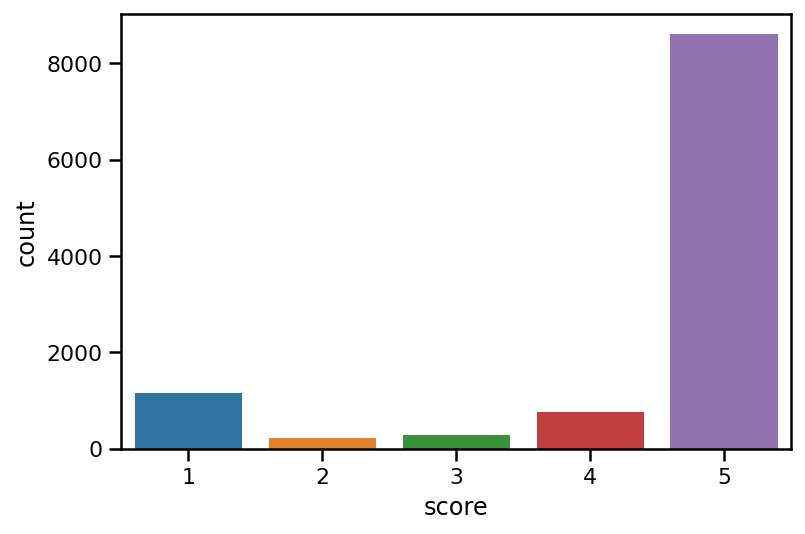

In [206]:
%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
sns.countplot(x="score", data=df_busu)
df_busu['score'].value_counts()

In [157]:
df_busu
df_busu['Date'] = pd.to_datetime(df_busu['at'])
df_busu['Date'] = df_busu['Date'].dt.year

In [158]:
dfgroup =  df_busu.groupby(['Date', 'score']).size().reset_index(name='counts')

<AxesSubplot:xlabel='Date', ylabel='counts'>

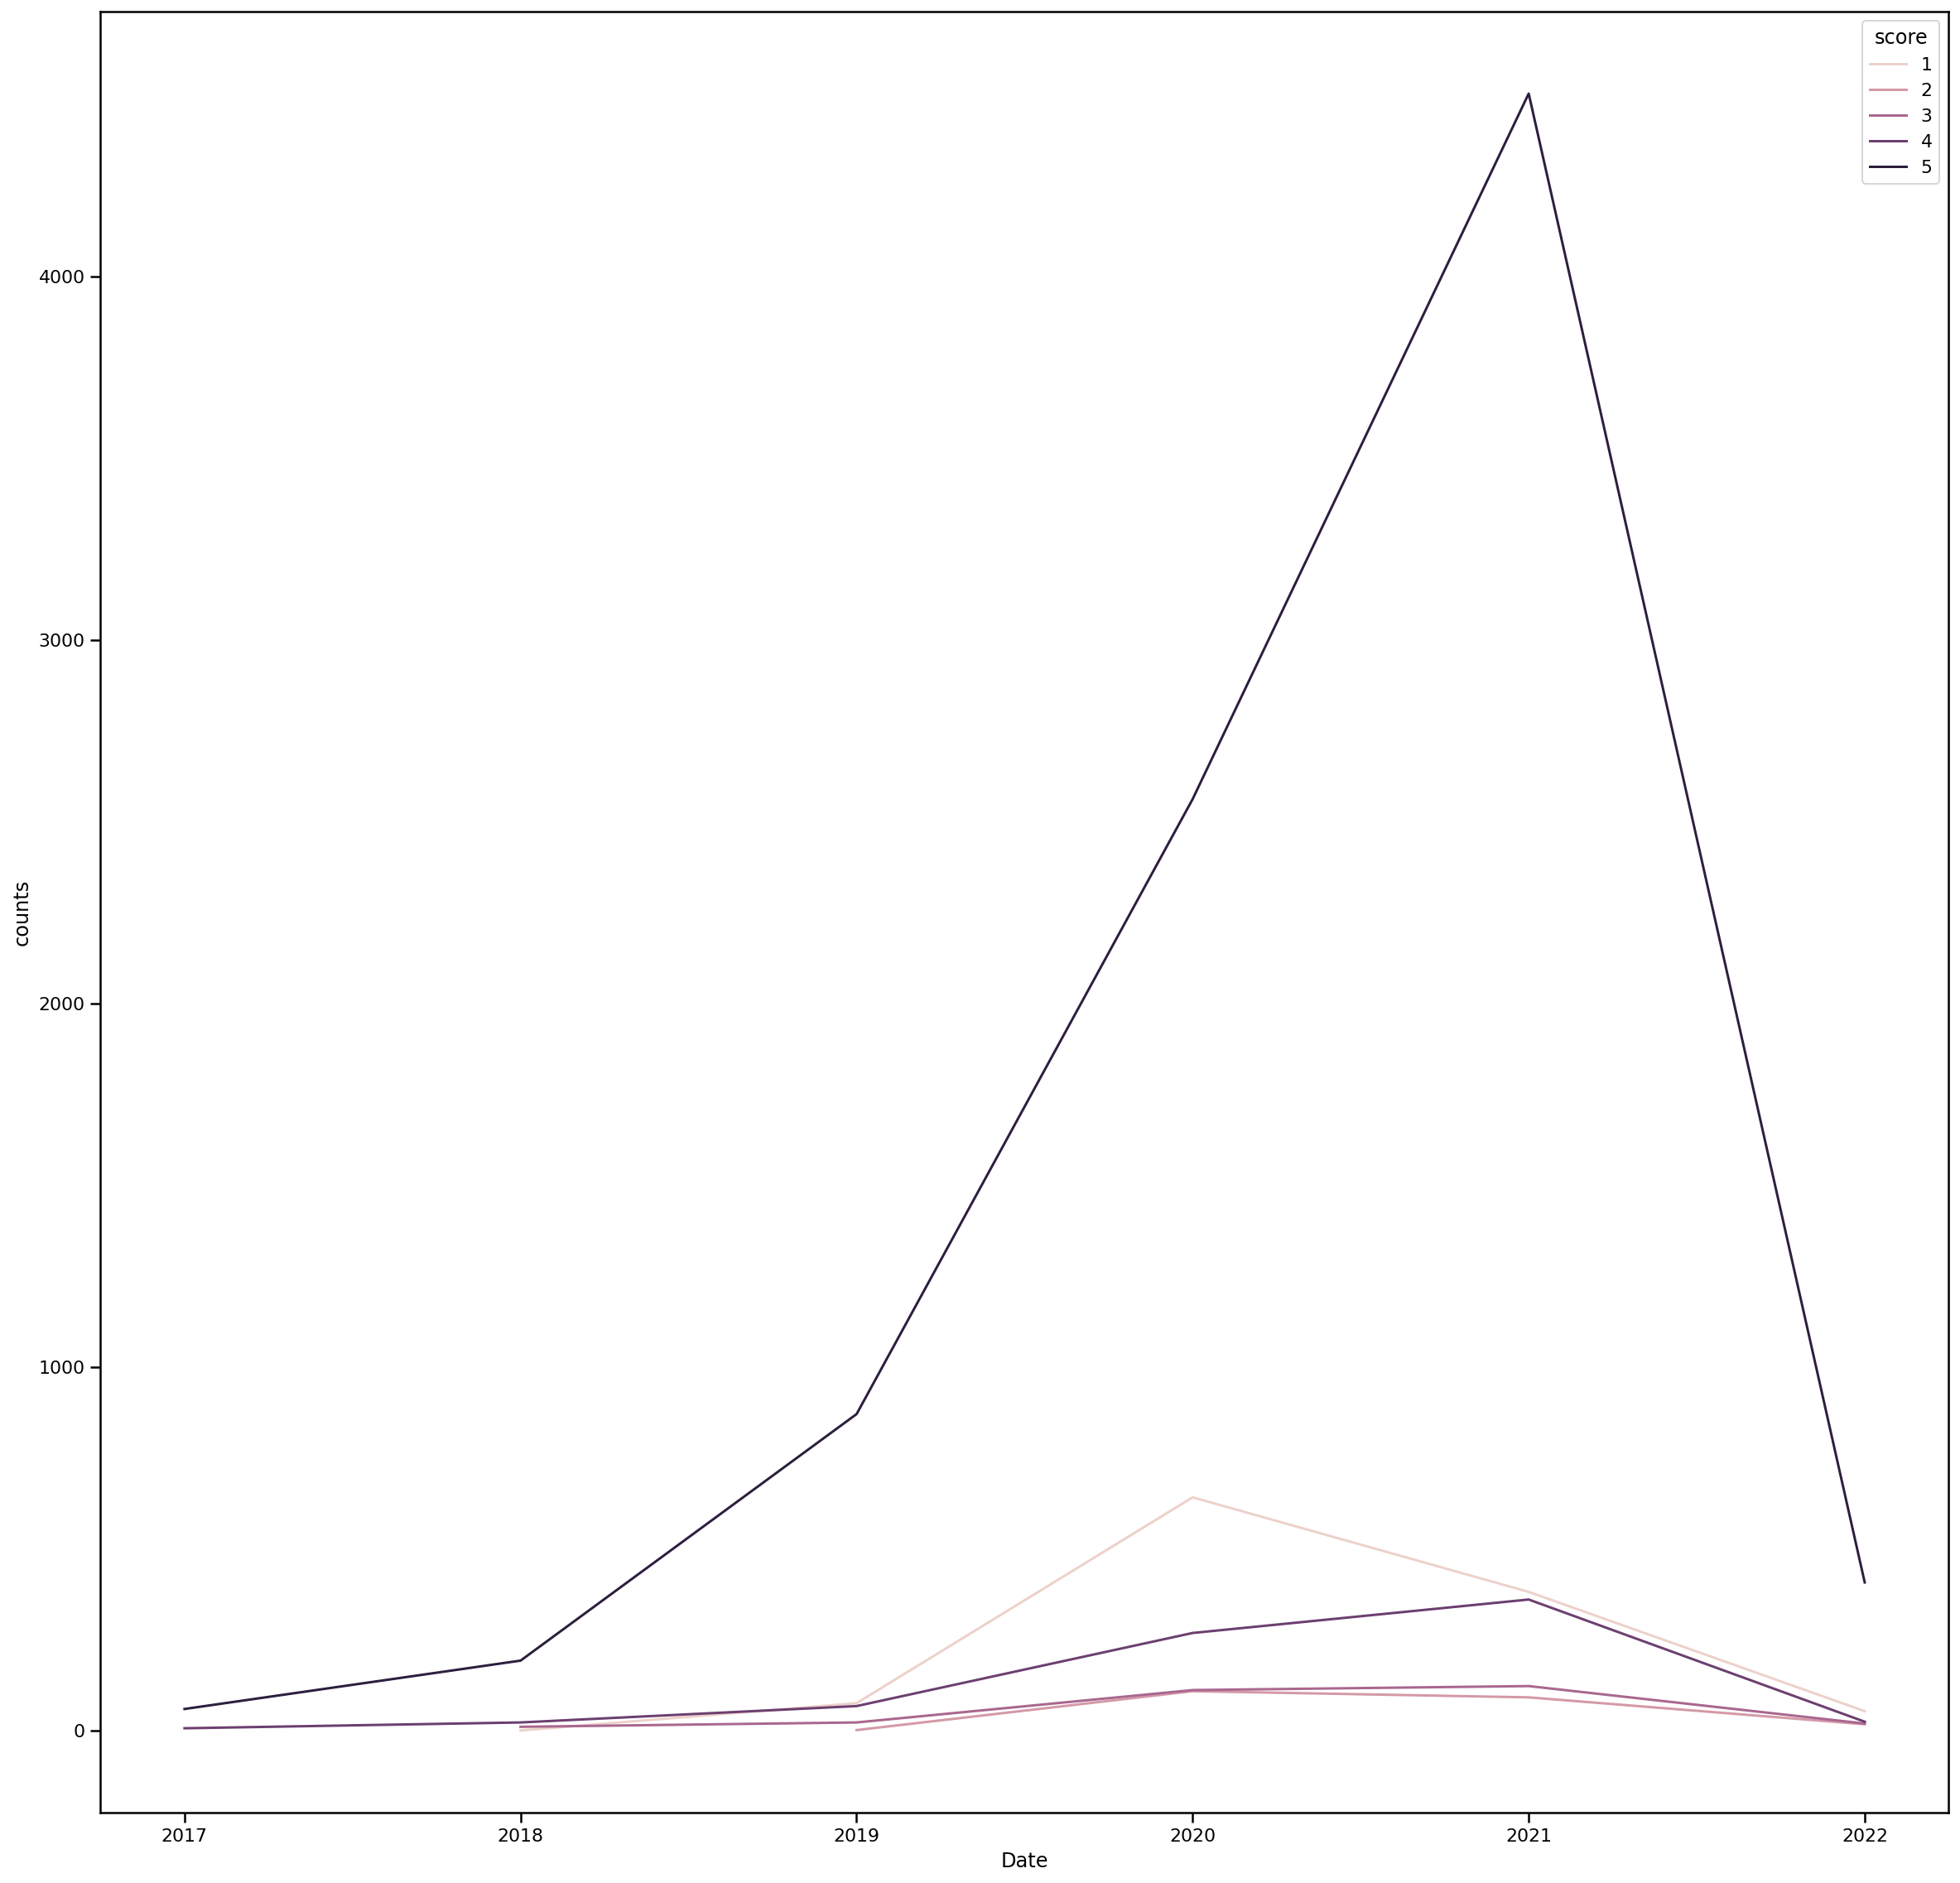

In [159]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=dfgroup, x='Date' ,y ='counts' , hue ='score' )

In [160]:
df_busu=df_busu[["reviewCreatedVersion", "score","content"]]

In [161]:
check_total_none=df_busu.isnull().sum()
print(check_total_none)

reviewCreatedVersion    1675
score                      0
content                    0
dtype: int64


In [162]:
score_high= df_busu[df_busu["score"]==5]
print("score high:",score_high)

score_mid=df_busu[df_busu["score"]==3]
print("score_mid:",score_mid)

score high:       reviewCreatedVersion  score  \
0                   2.63.1      5   
2                     None      5   
3                   2.59.1      5   
4                   2.63.0      5   
6                   2.62.2      5   
...                    ...    ...   
11007                1.0.5      5   
11008                1.0.4      5   
11010                 None      5   
11012                1.0.1      5   
11013                1.0.0      5   

                                                 content  
0      Love to start my trip to work with the morning...  
2      I love waking up and reading God's words first...  
3                                 I love the daily word.  
4      Puts me at ease in my times of loneliness and ...  
6      Good App. Helps you grow deeper in relationshi...  
...                                                  ...  
11007  Positive prayer is a free gift that I'm so tha...  
11008  It was amazing. I am very happy about this app...  
11010       

In [163]:
print(df_busu.reviewCreatedVersion.unique())
print(df_busu.reviewCreatedVersion.nunique())

['2.63.1' '2.62.2' None '2.59.1' '2.63.0' '2.62.0' '2.60.2' '2.53.1'
 '2.62.1' '2.56.2' '2.59.2' '2.55.0' '2.61.0' '2.61.1' '2.42.9' '2.55.1'
 '2.52.6' '2.50.0' '2.60.1' '2.57.0' '2.54.1' '2.33.0' '2.58.0' '2.48.1'
 '2.52.1' '2.59.0' '2.51.0' '2.56.3' '2.50.1' '2.54.0' '2.53.0' '2.52.4'
 '2.47.2' '2.49.3' '2.42.6' '2.49.1' '2.42.2' '2.39.2' '2.56.1' '2.42.8'
 '2.49.2' '2.46.2' '2.52.0' '2.52.5' '2.52.3' '2.41.0' '2.52.2' '2.17.0'
 '2.49.0' '2.48.0' '2.29.0' '2.18.0' '2.42.7' '2.42.4' '2.39.1' '2.28.1'
 '2.36.0' '2.23.0' '2.42.5' '2.38.0' '2.39.0' '2.42.3' '2.37.1' '2.42.1'
 '2.26.0' '2.35.0' '2.31.1' '2.34.1' '2.32.2' '2.20.1' '2.25.0' '2.30.0'
 '2.34.0' '2.31.0' '2.37.0' '2.32.1' '2.32.0' '2.27.2' '2.27.1' '2.27.0'
 '2.24.0' '2.22.0' '1.4.2' '2.19.0' '2.16.1' '2.16.0' '2.15.0' '2.14.1'
 '2.13.3' '2.13.1' '2.11.1' '2.10.2' '1.8.2' '2.10.1' '2.10.0' '1.8.1'
 '1.8.0' '1.7.1' '1.7.0' '1.6.0' '1.5.1' '1.4.1' '1.3.1' '1.2.0'
 '1.0.10.0' '1.0.9' '1.0.8.2' '1.0.7' '1.0.8' '1.0.6' '1.0.5' '1.0

In [208]:
x=(df_busu.groupby('reviewCreatedVersion')['score'].mean())
print(x)

reviewCreatedVersion
1.0.0       5.000000
1.0.1       5.000000
1.0.10.0    5.000000
1.0.4       4.666667
1.0.5       4.875000
              ...   
2.62.0      4.833333
2.62.1      4.600000
2.62.2      4.609524
2.63.0      4.705882
2.63.1      4.600000
Name: score, Length: 113, dtype: float64


In [165]:
# Lower casing

# Change the reviews type to string
df_busu['content'] = df_busu['content'].astype(str)
# Before lowercasing
print(df_busu['content'][2])

I love waking up and reading God's words first thing in the morning!


<ipython-input-165-4d7d5da291c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu['content'] = df_busu['content'].astype(str)


In [166]:
#Lowercase all reviews
df_busu['content']= df_busu['content'].apply(lambda x: x.lower())
print(df_busu['content'][2]) ## to see the difference

i love waking up and reading god's words first thing in the morning!


<ipython-input-166-9f474baf2f95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu['content']= df_busu['content'].apply(lambda x: x.lower())


In [167]:
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(df_busu.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    #return expe.findall(s)
    return expe.sub(r'',s)

for y in df_busu['content']:
    #print(str(extract_emojis(y)))
    extracted_emojis.append(str(extract_emojis(y)))
print(extracted_emojis)

True
['love to start my trip to work with the morning prayer.', 'legit reviews deleted', "i love waking up and reading god's words first thing in the morning!", 'i love the daily word.', 'puts me at ease in my times of loneliness and sorrow. i know god is with me.', "bait & switch app. can't use it without committing to a subscription which will charge you $60 after 3 days of you don't cancel. can't even try it before approving automatic subscription after 3 days.", 'good app. helps you grow deeper in relationship to god', 'i am satisfied with the app content and i am not even a subscriber. i use the free access features. the two daily prayers are focused on scriptures and are encouraging.', 'true blessing daily. in jesus name amen. thank you for everything. in jesus name amen!!!', 'i love this app.', 'great app!', 'blessing', "it's great", 'i love praying with my daily pray and sharing with friends so can pray together.', "love this app. helps me stay on track with daily prayer and re

In [168]:
# stop words

stop_words=stopwords.words('english')
df_busu['extracted_emojis'] = extracted_emojis
df_busu['extracted_emojis']= df_busu['extracted_emojis'].apply(lambda x:x if x not in stop_words else None)
print(df_busu['extracted_emojis'][5])

bait & switch app. can't use it without committing to a subscription which will charge you $60 after 3 days of you don't cancel. can't even try it before approving automatic subscription after 3 days.


<ipython-input-168-05cbb92ef56d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu['extracted_emojis'] = extracted_emojis
<ipython-input-168-05cbb92ef56d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu['extracted_emojis']= df_busu['extracted_emojis'].apply(lambda x:x if x not in stop_words else None)


In [169]:
# stemming

def stemming(x):
    st = PorterStemmer()
    if x is not None:
       for word in x.split():
           st.stem(word)

df_busu['extracted_emojis'].apply(lambda x:stemming(x))
print(df_busu['extracted_emojis'][100])

it's a great app , wish i could afford to buy the yearly not that i think its unreasonable it's just high for people tight on money.


In [178]:
#Function to calculate sentiment score for whole data set

def senti_sc(x):
    if x is not None:
       return TextBlob(x).sentiment

df_busu["Sentiment_score"]= df_busu["extracted_emojis"].apply(senti_sc)
print(df_busu.loc[0:19,['extracted_emojis','Sentiment_score']])
df_busu.close()

                                     extracted_emojis  \
0   love to start my trip to work with the morning...   
1                               legit reviews deleted   
2   i love waking up and reading god's words first...   
3                              i love the daily word.   
4   puts me at ease in my times of loneliness and ...   
5   bait & switch app. can't use it without commit...   
6   good app. helps you grow deeper in relationshi...   
7   i am satisfied with the app content and i am n...   
8   true blessing daily. in jesus name amen. thank...   
9                                    i love this app.   
10                                         great app!   
11                                           blessing   
12                                         it's great   
13  i love praying with my daily pray and sharing ...   
14  love this app. helps me stay on track with dai...   
15                      very good makes me feel happy   
16  by the use of god's word th

<ipython-input-178-9cb741f9be2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu["Sentiment_score"]= df_busu["extracted_emojis"].apply(senti_sc)


AttributeError: 'DataFrame' object has no attribute 'close'

In [179]:
df_busu

,reviewCreatedVersion,score,content,extracted_emojis,Sentiment_score,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
0,2.63.1,5,love to start my trip to work with the morning...,love to start my trip to work with the morning...,"(0.5, 0.6)",0.500000,0.600000,Positive
1,2.62.2,1,legit reviews deleted,legit reviews deleted,"(0.0, 0.0)",0.000000,0.000000,Neutral
2,None,5,i love waking up and reading god's words first...,i love waking up and reading god's words first...,"(0.40625, 0.4666666666666667)",0.406250,0.466667,Positive
3,2.59.1,5,i love the daily word.,i love the daily word.,"(0.25, 0.3)",0.250000,0.300000,Positive
4,2.63.0,5,puts me at ease in my times of loneliness and ...,puts me at ease in my times of loneliness and ...,"(0.0, 0.0)",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
11009,1.0.4,4,sig sent me to this app,sig sent me to this app,"(0.0, 0.0)",0.000000,0.000000,Neutral
11010,None,5,its amazing,its amazing,"(0.6000000000000001, 0.9)",0.600000,0.900000,Positive
11011,None,4,sig sent me,sig sent me,"(0.0, 0.0)",0.000000,0.000000,Neutral
11012,1.0.1,5,every time i try to use this app it keeps shut...,every time i try to use this app it keeps shut...,"(0.0, 0.0)",0.000000,0.000000,Neutral


In [180]:
 df_busu[['Sentiment_Polarity', 'Sentiment_Subjectivity']] = pd.DataFrame(df_busu['Sentiment_score'].tolist(), index=df_busu.index)

C:\Users\Perelius\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [181]:
df_busu

,reviewCreatedVersion,score,content,extracted_emojis,Sentiment_score,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
0,2.63.1,5,love to start my trip to work with the morning...,love to start my trip to work with the morning...,"(0.5, 0.6)",0.500000,0.600000,Positive
1,2.62.2,1,legit reviews deleted,legit reviews deleted,"(0.0, 0.0)",0.000000,0.000000,Neutral
2,None,5,i love waking up and reading god's words first...,i love waking up and reading god's words first...,"(0.40625, 0.4666666666666667)",0.406250,0.466667,Positive
3,2.59.1,5,i love the daily word.,i love the daily word.,"(0.25, 0.3)",0.250000,0.300000,Positive
4,2.63.0,5,puts me at ease in my times of loneliness and ...,puts me at ease in my times of loneliness and ...,"(0.0, 0.0)",0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...
11009,1.0.4,4,sig sent me to this app,sig sent me to this app,"(0.0, 0.0)",0.000000,0.000000,Neutral
11010,None,5,its amazing,its amazing,"(0.6000000000000001, 0.9)",0.600000,0.900000,Positive
11011,None,4,sig sent me,sig sent me,"(0.0, 0.0)",0.000000,0.000000,Neutral
11012,1.0.1,5,every time i try to use this app it keeps shut...,every time i try to use this app it keeps shut...,"(0.0, 0.0)",0.000000,0.000000,Neutral


In [182]:
conditions = [
    (df_busu['Sentiment_Polarity'] == 0) ,
    (df_busu['Sentiment_Polarity'] > 0),
    (df_busu['Sentiment_Polarity'] < 0)]
choices = ['Neutral', 'Positive', 'Negative']
df_busu['Sentiment'] = np.select(conditions, choices, default='Neutral')

<ipython-input-182-d760bab0b2c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu['Sentiment'] = np.select(conditions, choices, default='Neutral')


In [183]:
df_busu['Sentiment'].value_counts()

Positive    8475
Neutral     1929
Negative     610
Name: Sentiment, dtype: int64

C:\Users\Perelius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


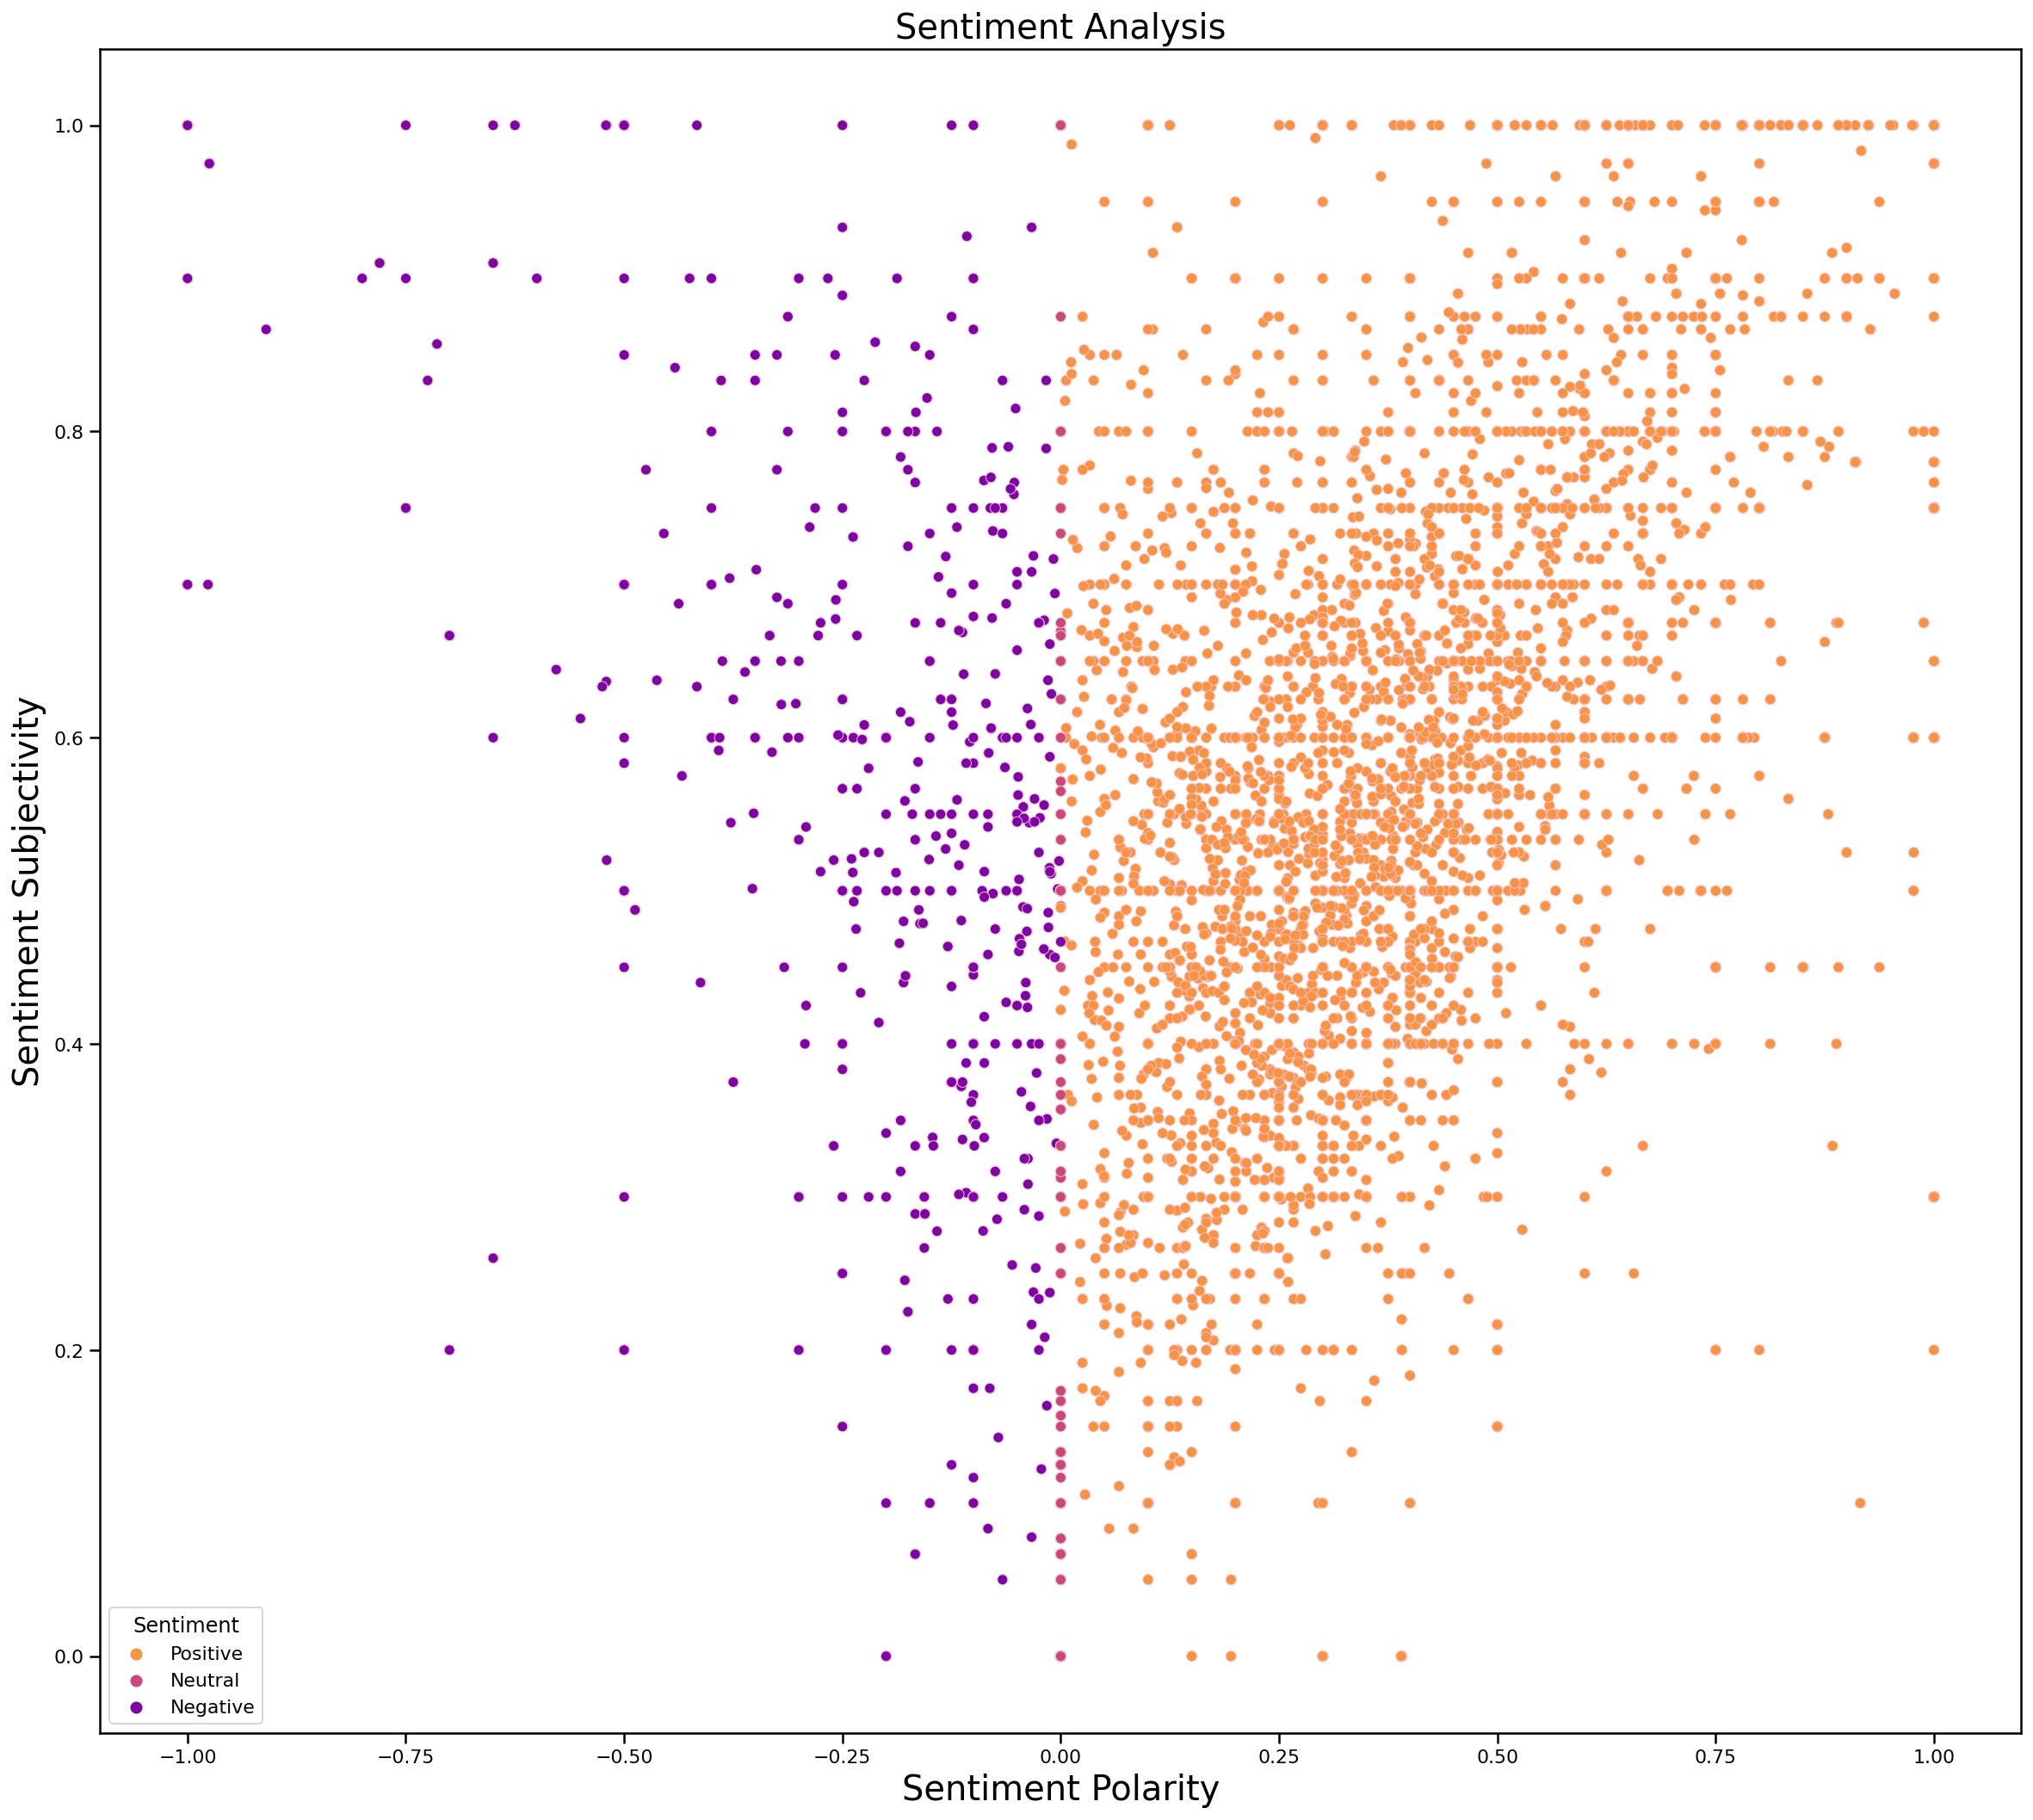

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
j = sns.scatterplot(df_busu['Sentiment_Polarity'],df_busu['Sentiment_Subjectivity'],hue=df_busu['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [185]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [186]:
df_busu.shape

(11014, 8)

In [188]:
df_busu["index"] = range(0,11014)
df_busu = df_busu.set_index("index")
df_busu.head()


<ipython-input-188-b9a78c16a901>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_busu["index"] = range(0,11014)


,reviewCreatedVersion,score,content,extracted_emojis,Sentiment_score,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment
index,,,,,,,,
0,2.63.1,5,love to start my trip to work with the morning...,love to start my trip to work with the morning...,"(0.5, 0.6)",0.50000,0.600000,Positive
1,2.62.2,1,legit reviews deleted,legit reviews deleted,"(0.0, 0.0)",0.00000,0.000000,Neutral
2,None,5,i love waking up and reading god's words first...,i love waking up and reading god's words first...,"(0.40625, 0.4666666666666667)",0.40625,0.466667,Positive
3,2.59.1,5,i love the daily word.,i love the daily word.,"(0.25, 0.3)",0.25000,0.300000,Positive
4,2.63.0,5,puts me at ease in my times of loneliness and ...,puts me at ease in my times of loneliness and ...,"(0.0, 0.0)",0.00000,0.000000,Neutral


In [195]:
df_busu['extracted_emojis'] = df_busu['extracted_emojis'].astype(str)

In [196]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,11014):
    review = re.sub('[^a-zA-Z]', ' ',df_busu['extracted_emojis'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',df_busu['extracted_emojis'][i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',df_busu['extracted_emojis'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

['love start trip work morn prayer',
 'legit review delet',
 'love wake read god word first thing morn',
 'love daili word',
 'put eas time loneli sorrow know god',
 'bait switch app use without commit subscript charg 60 3 day cancel even tri approv automat subscript 3 day',
 'good app help grow deeper relationship god',
 'satisfi app content even subscrib use free access featur two daili prayer focus scriptur encourag',
 'true bless daili jesu name amen thank everyth jesu name amen',
 'love app',
 'great app',
 'bless',
 'great',
 'love pray daili pray share friend pray togeth',
 'love app help stay track daili prayer reflect love narrat voic peac',
 'good make feel happi',
 'use god word app illumin power god god love listen scriptur believ heart lighten gave son may etern life ask come',
 '',
 'daili essenti inspir prayer listen favorit ministri podcast',
 'start day without',
 'great',
 'never could made without',
 'great way get uplift daili',
 'great pray chang world gbu steve l'

In [197]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

['love',
 'start',
 'trip',
 'work',
 'morn',
 'prayer',
 'legit',
 'review',
 'delet',
 'love',
 'wake',
 'read',
 'god',
 'word',
 'first',
 'thing',
 'morn',
 'love',
 'daili',
 'word',
 'put',
 'eas',
 'time',
 'loneli',
 'sorrow',
 'know',
 'god',
 'bait',
 'switch',
 'app',
 'use',
 'without',
 'commit',
 'subscript',
 'charg',
 '60',
 '3',
 'day',
 'cancel',
 'even',
 'tri',
 'approv',
 'automat',
 'subscript',
 '3',
 'day',
 'good',
 'app',
 'help',
 'grow',
 'deeper',
 'relationship',
 'god',
 'satisfi',
 'app',
 'content',
 'even',
 'subscrib',
 'use',
 'free',
 'access',
 'featur',
 'two',
 'daili',
 'prayer',
 'focus',
 'scriptur',
 'encourag',
 'true',
 'bless',
 'daili',
 'jesu',
 'name',
 'amen',
 'thank',
 'everyth',
 'jesu',
 'name',
 'amen',
 'love',
 'app',
 'great',
 'app',
 'bless',
 'great',
 'love',
 'pray',
 'daili',
 'pray',
 'share',
 'friend',
 'pray',
 'togeth',
 'love',
 'app',
 'help',
 'stay',
 'track',
 'daili',
 'prayer',
 'reflect',
 'love',
 'narrat',

In [198]:
from collections import Counter
words_counts = Counter(words)

In [199]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

C:\Users\Perelius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


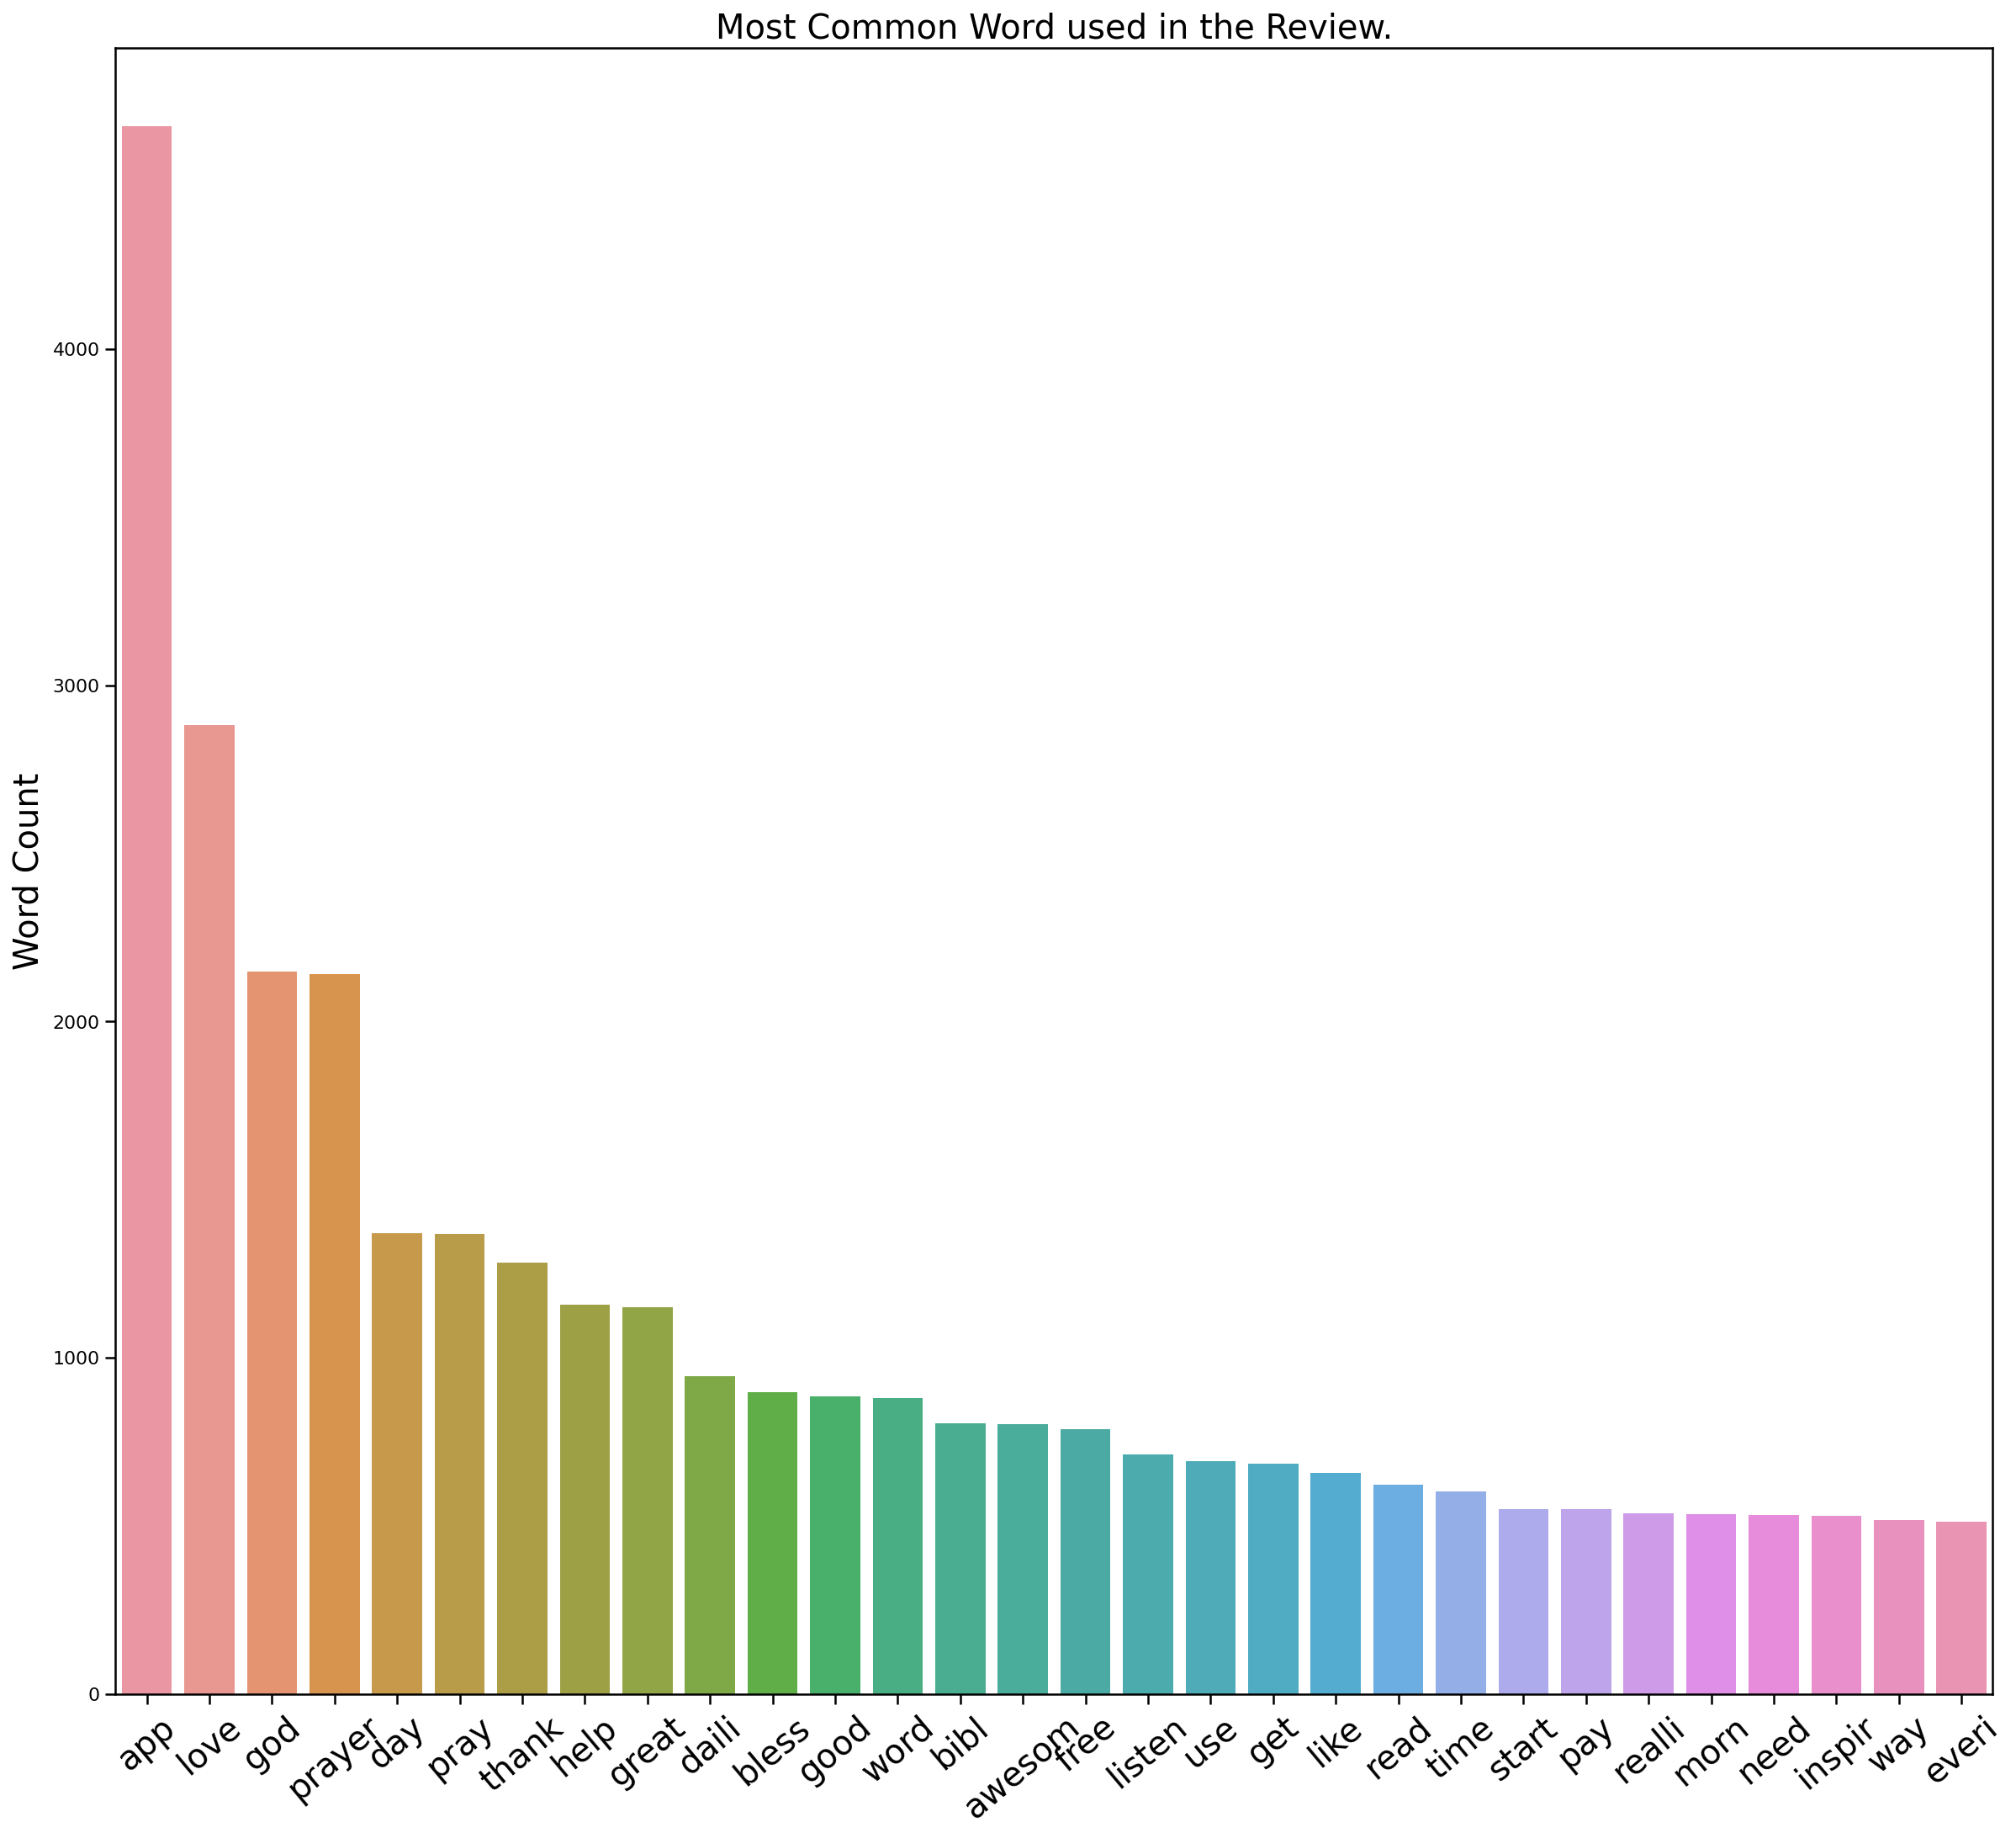

In [200]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [202]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
Positive=[]
Neutral=[]
Negative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        #if i in z:
            #Sentiment.append(Data['Sentiment_Polarity'][corpus.index(z)])
    #Sentiment_Polarity.append(Sentiment)
        if i in z and df_busu['Sentiment'][corpus.index(z)]=='Positive':
            Positive.append(i)
        if i in z and df_busu['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and df_busu['Sentiment'][corpus.index(z)]=='Negative':
            Negative.append(i)

C:\Users\Perelius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Perelius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Perelius\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


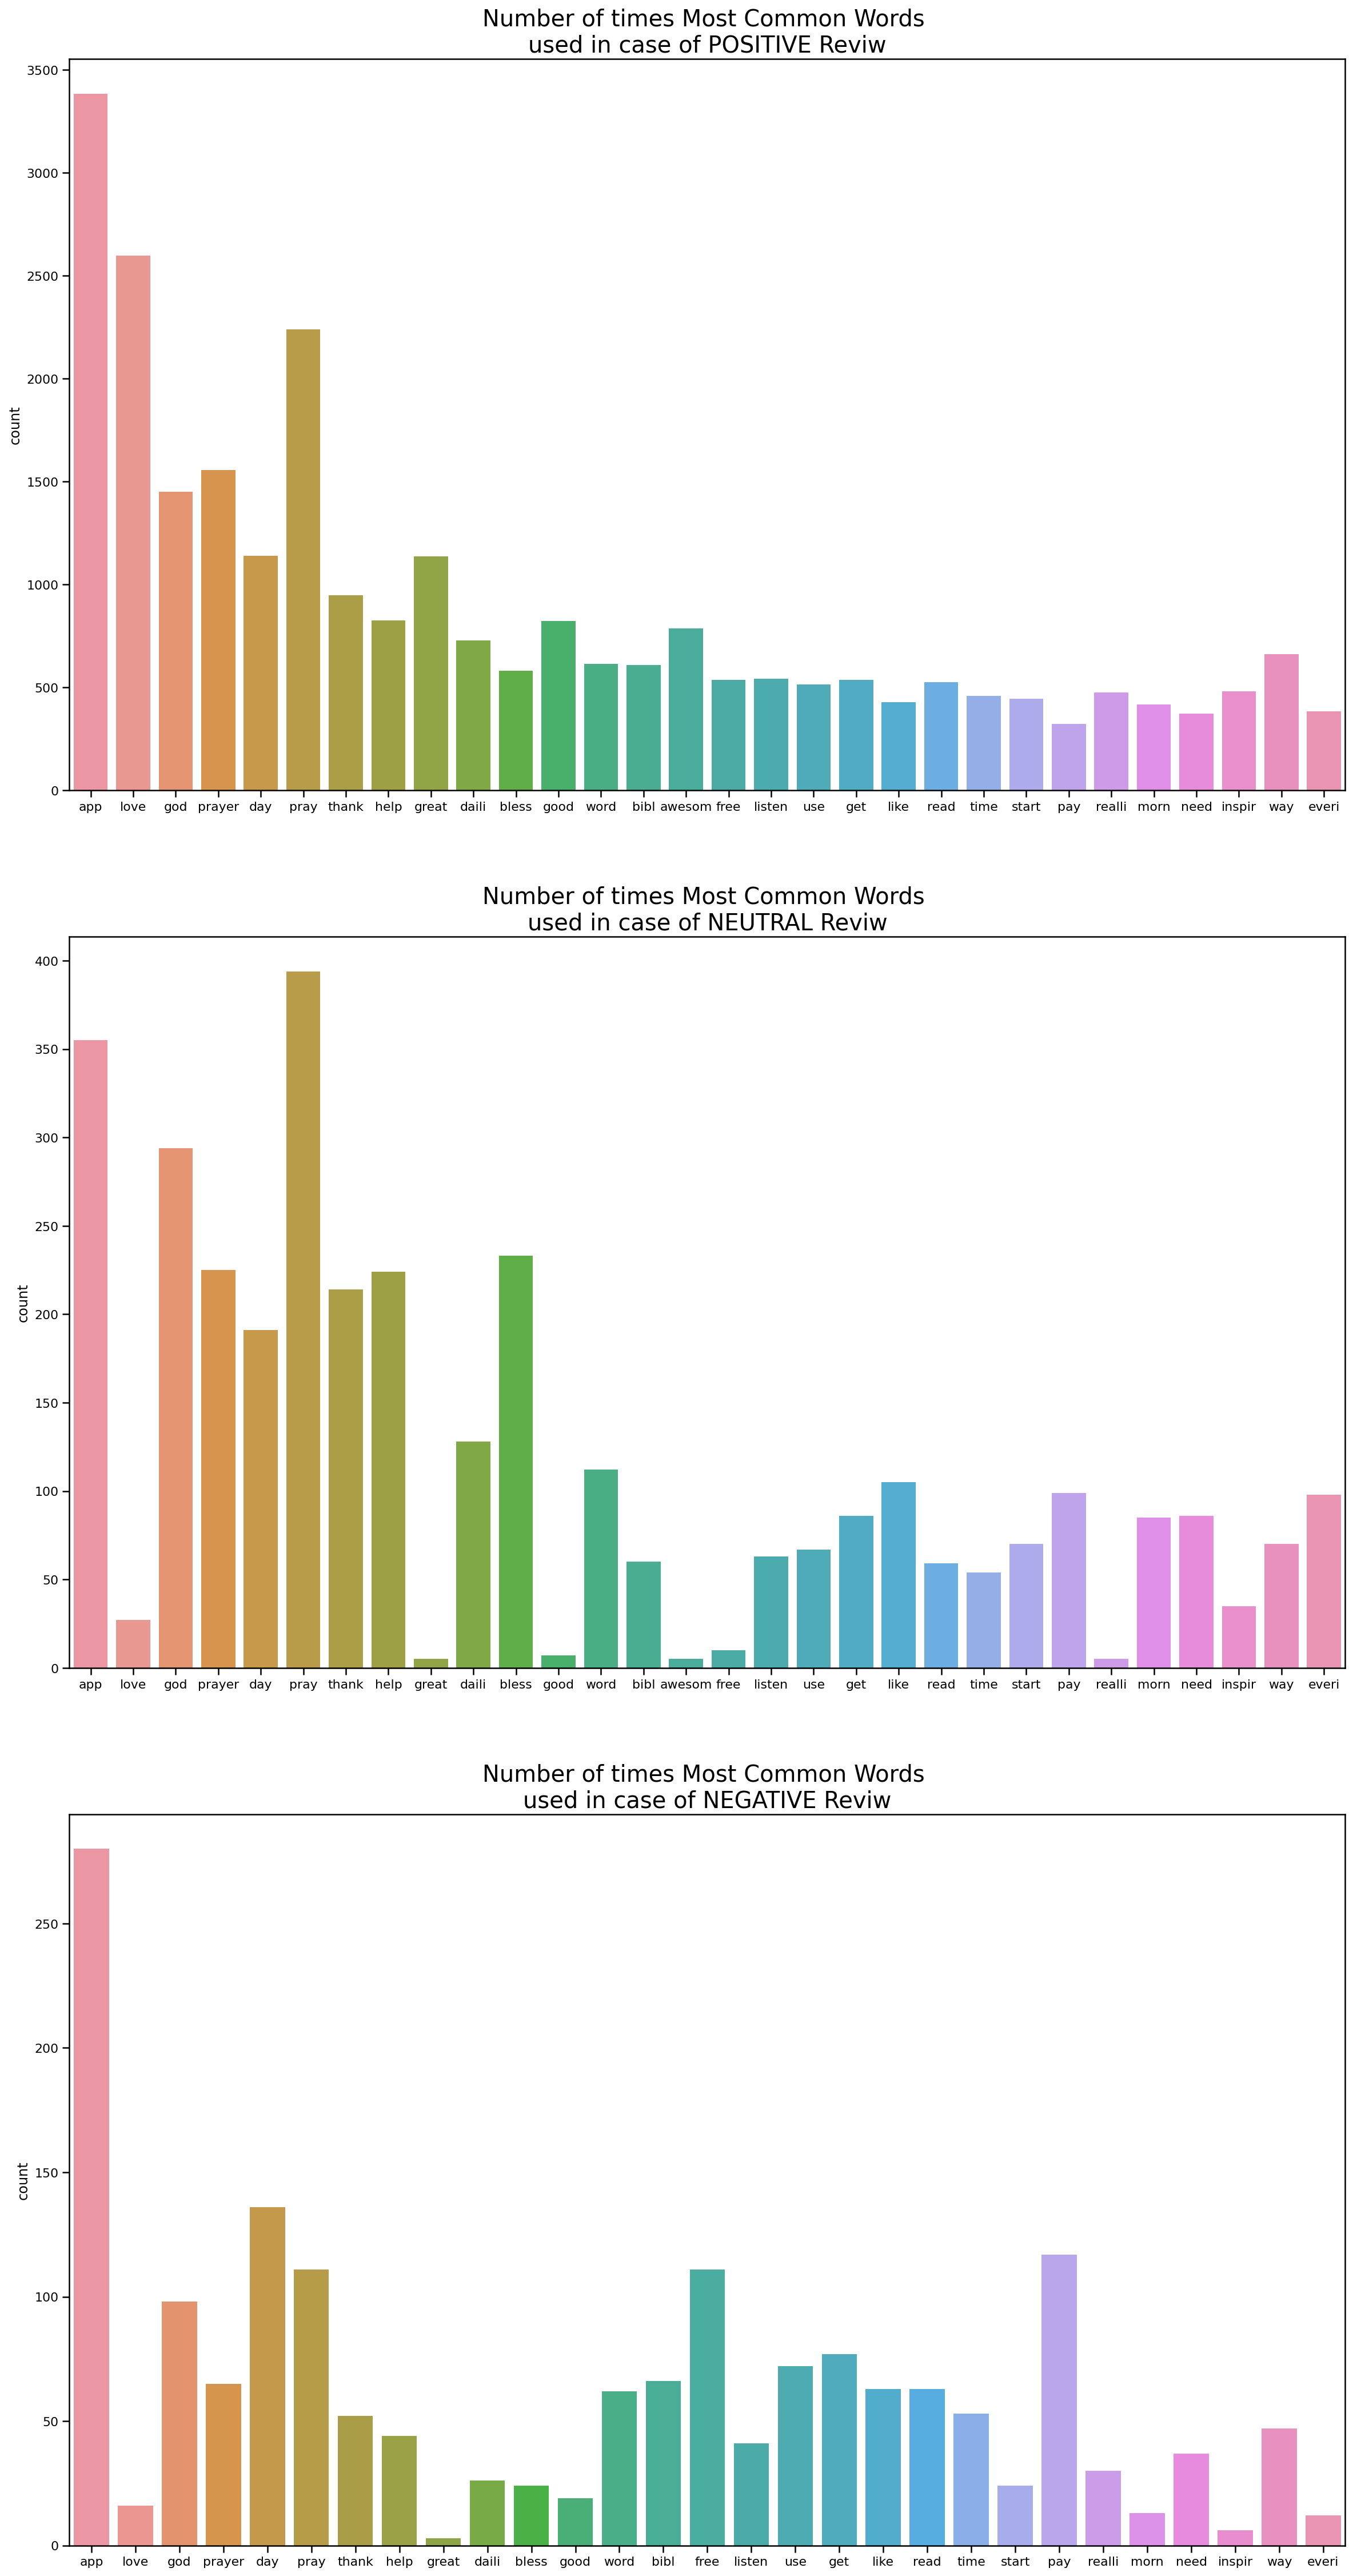

In [203]:
f,ax = plt.subplots(3,1,figsize=(20,40))
c1 = sns.countplot(Positive, ax=ax[0])
c2 = sns.countplot(Neutral,ax=ax[1])
c3 = sns.countplot(Negative,ax=ax[2])
ax[0].set_title("Number of times Most Common Words \nused in case of POSITIVE Reviw",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of NEUTRAL Reviw",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEGATIVE Reviw",fontsize=20)
plt.show()

In [189]:
pip install app_store_scraper


  Using cached requests-2.23.0-py2.py3-none-any.whl (58 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.1.0 requires requests>=2.24.0, but you have requests 2.23.0 which is incompatible.


# APPLE

In [15]:
from app_store_scraper import AppStore
# for keeping track of timing
import datetime as dt


# for building in wait times
import random
import time


import pandas as pd

import numpy as np

import json

pray = AppStore(country='us', app_name='pray-com-bible-daily-prayer', app_id = '1161035371')

pray.review()


2022-02-18 11:48:39,590 [INFO] Base - Initialised: AppStore('us', 'pray-com-bible-daily-prayer', 1161035371)
2022-02-18 11:48:39,591 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/pray-com-bible-daily-prayer/id1161035371
2022-02-18 11:48:45,277 [INFO] Base - [id:1161035371] Fetched 140 reviews (140 fetched in total)
2022-02-18 11:48:51,453 [INFO] Base - [id:1161035371] Fetched 280 reviews (280 fetched in total)
2022-02-18 11:48:57,442 [INFO] Base - [id:1161035371] Fetched 420 reviews (420 fetched in total)
2022-02-18 11:49:03,653 [INFO] Base - [id:1161035371] Fetched 560 reviews (560 fetched in total)
2022-02-18 11:49:09,754 [INFO] Base - [id:1161035371] Fetched 700 reviews (700 fetched in total)
2022-02-18 11:49:15,943 [INFO] Base - [id:1161035371] Fetched 840 reviews (840 fetched in total)
2022-02-18 11:49:21,995 [INFO] Base - [id:1161035371] Fetched 980 reviews (980 fetched in total)
2022-02-18 11:49:28,420 [INFO] Base - [id:1161035371] Fetched 1120 reviews

2022-02-18 11:57:08,052 [INFO] Base - [id:1161035371] Fetched 11580 reviews (11580 fetched in total)
2022-02-18 11:57:14,606 [INFO] Base - [id:1161035371] Fetched 11740 reviews (11740 fetched in total)
2022-02-18 11:57:20,563 [INFO] Base - [id:1161035371] Fetched 11880 reviews (11880 fetched in total)
2022-02-18 11:57:26,488 [INFO] Base - [id:1161035371] Fetched 12020 reviews (12020 fetched in total)
2022-02-18 11:57:33,034 [INFO] Base - [id:1161035371] Fetched 12180 reviews (12180 fetched in total)
2022-02-18 11:57:38,975 [INFO] Base - [id:1161035371] Fetched 12320 reviews (12320 fetched in total)
2022-02-18 11:57:45,267 [INFO] Base - [id:1161035371] Fetched 12460 reviews (12460 fetched in total)
2022-02-18 11:57:51,366 [INFO] Base - [id:1161035371] Fetched 12600 reviews (12600 fetched in total)
2022-02-18 11:57:57,373 [INFO] Base - [id:1161035371] Fetched 12740 reviews (12740 fetched in total)
2022-02-18 11:58:03,319 [INFO] Base - [id:1161035371] Fetched 12880 reviews (12880 fetched 

In [16]:
pray.reviews

[{'userName': 'finding me again',
  'isEdited': False,
  'review': "I have extremely bad anxiety when I was younger my husband was injured and died after a few weeks later and I never sought help 🆘from a Professional. We had three children, all boys and I felt the need to find a father to give the boys guidance, 10 yrs. Later I had a daughter which was my desire and that relationship didn't work. I later started investing all my time in the kids, which led me down a dark path I got to a point I questioned everything they did who they hung out with, who they dated an where they would go, and so forth. It got to a point where I was becoming everyone’s mom and everyone’s everything until  I was asked to please leave people alone. I left myself out and my stress levels and my anxiety levels kept rising higher until I got to this point where I'm now. \nSo fast forward today I’ve had four strokes in the past three weeks which three we’re considered mild and one was not that bad but it was a 

In [17]:
df = pd.DataFrame(np.array(pray.reviews),columns=['review'])

df2 = df.join(pd.DataFrame(df.pop('review').tolist()))

df2.head()


,userName,isEdited,review,developerResponse,title,date,rating
0,finding me again,False,I have extremely bad anxiety when I was younge...,"{'id': 23352417, 'body': 'Denise. We really ap...",Pray 🙏🏽 changes everything,2021-06-10 12:10:08,5
1,JesusCaresForYou,False,Our family has enjoyed the prayer initiators b...,"{'id': 21080486, 'body': 'Thank you for your k...","Some nice features, but expensive",2021-02-14 13:55:33,2
2,MuenchnerKindl,True,I love the app itself. It really makes me givi...,"{'id': 22341979, 'body': 'MuenchnerKindl. We r...",Love the app,2021-05-10 11:40:59,4
3,gclifton78,True,"Ok, while I absolutely love using this app, th...","{'id': 15653927, 'body': 'Thank you for your k...",Definitely a 5+,2020-05-30 15:05:32,5
4,Jesusbuddy101,True,Thank you so much for creating the Pray App. I...,"{'id': 14267758, 'body': 'Jesusbuddy101 , I wa...",Review of the Pray App,2021-07-25 14:27:43,5


In [1]:
df3 = pd.read_csv('App Store Review.csv')

<IPython.core.display.Javascript object>

In [19]:
df2 = df3.append(df2)

In [20]:
df2 = df2.drop_duplicates(subset='review', keep="last")

In [22]:
df2.to_csv('App Store Review.csv')

In [21]:
df2

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,developerResponse,userName,date,review,isEdited,title,rating
1565,1565.0,1565.0,1565.0,"{'id': 27710958, 'body': ""bp&fp=happi. We are ...",bp&fp=happi,2022-01-26 01:35:05,I am verrrry pleased to have Pray available an...,False,Appreciation,4
2499,2499.0,2499.0,2499.0,"{'id': 19735330, 'body': ""skyybay420, thank yo...",skyybay420,2020-12-12 16:41:25,This app is simply helping me get THAT much cl...,False,God bless this app!,5
4358,4358.0,458.0,NaN,"{'id': 16956404, 'body': 'Thanks for the aweso...",truth and the light,2020-07-24 10:20:14,I love this app when a person uses their phone...,False,Winning the day,5
5080,5080.0,1180.0,NaN,"{'id': 20578633, 'body': 'curly head girly, th...",curly head girly,2021-01-20 23:01:49,I enjoy this app. It’s apart of my morning pra...,False,Good App,5
5361,5361.0,1461.0,NaN,"{'id': 27842088, 'body': ' Ricky EMHs, thank y...",Ricky EMHs,2022-02-03 01:27:59,I love watching pray every morning and evening...,False,Pray,5
...,...,...,...,...,...,...,...,...,...,...
14483,NaN,NaN,NaN,"{'id': 27663090, 'body': 'Uncle Ball, I wanted...",Uncle Ball,2022-02-15 13:30:36,This prayer site is a great way for myMind to ...,True,This is A Awesome site,5
14484,NaN,NaN,NaN,NaN,Zebra963,2022-02-15 13:27:35,"In addition to my early time with God, this pr...",False,Daily Prayer,5
14485,NaN,NaN,NaN,"{'id': 22884717, 'body': 'PeachesBeau, thank y...",PeachesBeau,2022-02-15 13:18:32,I want to share that the morning prayers and B...,True,Donna,5
14486,NaN,NaN,NaN,NaN,Cypress0617,2022-02-15 11:25:37,It gives me faith and peace getting my day sta...,False,Scripture reading every morning,5


In [11]:
from itunes_app_scraper.scraper import AppStoreScraper

scraper = AppStoreScraper()
results = scraper.get_app_ids_for_query("pray-com-bible-daily-prayer")
similar = scraper.get_similar_app_ids_for_app(results[0])

app_details = scraper.get_multiple_app_details(similar)
print(list(app_details))

SyntaxError: invalid syntax (<ipython-input-11-b85e6eb042b3>, line 1)

In [7]:
df3 = df3[[ 'date', 'developerResponse', 'userName','review', 'isEdited', 'title',
       'rating']]

In [8]:
df3.to_csv('App Store Review.csv')